# How to open a PyStructure

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#make plots look nicer
from matplotlib import rc
rc('font',family='DejaVu Sans',size=20)
rc('mathtext',fontset='dejavusans')
rc('figure', figsize=(1.41421356237*6.,6.)) 
rc('lines', linewidth=1.8,marker=None,markersize=8 )
rc('axes', linewidth=1.5,labelsize=19,prop_cycle=plt.cycler(color=('k','r','b','darkorange','steelblue','hotpink','gold','c','maroon','darkgreen')) )
rc(('xtick.major','ytick.major'), size=5.2,width=1.5)
rc(('xtick.minor','ytick.minor'), size=3.2,width=1.5,visible=True)
rc(('xtick','ytick'), labelsize=16, direction='in' )
rc(('xtick'), top=True,bottom=True ) # For some stupid reason you have to do these seperately
rc(('ytick'), left=True
   ,right=True )
rc('legend',numpoints=1,scatterpoints=1,labelspacing=0.2,fontsize=18,fancybox=True,handlelength=1.5,
            handletextpad=0.5)
rc('savefig', dpi=150,format='pdf',bbox='tight' )
rc('errorbar',capsize=3.)

**Import the PyStructure**

In [18]:
struct = np.load('./../PyStructure/Output/ngc6946_data_struct_2020_10_02.npy',allow_pickle = True).item()

A structure is just a collection of points:

In [19]:
struct["INT_VAL_12CO21"]

array([0., 0., 0., ..., 0., 0., 0.])

In [20]:
struct.keys()

dict_keys(['gal', 'ra_deg', 'dec_deg', 'dist_mpc', 'posang_deg', 'incl_deg', 'beam_as', 'rgal_as', 'rgal_kpc', 'rgal_r25', 'theta_rad', 'SPEC_VAL_12CO21', 'SPEC_VCHAN0_12CO21', 'SPEC_DELTAV_12CO21', 'SPEC_UC_12CO21', 'SPEC_COV_12CO21', 'SPEC_RES_12CO21', 'SPEC_UNIT_12CO21', 'SPEC_DESC_12CO21', 'INT_VAL_12CO21', 'INT_UC_12CO21', 'INT_COV_12CO21', 'INT_RES_12CO21', 'INT_UNIT_12CO21', 'INT_DESC_12CO21', 'SPEC_VAL_CII', 'SPEC_VCHAN0_CII', 'SPEC_DELTAV_CII', 'SPEC_UC_CII', 'SPEC_COV_CII', 'SPEC_RES_CII', 'SPEC_UNIT_CII', 'SPEC_DESC_CII', 'INT_VAL_CII', 'INT_UC_CII', 'INT_COV_CII', 'INT_RES_CII', 'INT_UNIT_CII', 'INT_DESC_CII', 'INT_VAL_V12CO21', 'SPEC_VAL_SHUFF12CO21', 'SPEC_VCHAN0_SHUFF12CO21', 'SPEC_DELTAV_SHUFF12CO21', 'SPEC_UC_SHUFF12CO21', 'SPEC_COV_SHUFF12CO21', 'SPEC_RES_SHUFF12CO21', 'SPEC_UNIT_SHUFF12CO21', 'SPEC_DESC_SHUFF12CO21', 'SPEC-DELTAV_SHUFF12CO21', 'SPEC_VAL_SHUFFCII', 'SPEC_VCHAN0_SHUFFCII', 'SPEC_DELTAV_SHUFFCII', 'SPEC_UC_SHUFFCII', 'SPEC_COV_SHUFFCII', 'SPEC_RES_SHUFF

# Make a nice Intensity Map

We can recunstruct the image based on the coordinates of every point:

In [21]:
# get the coordinates from the structure
ra = struct["ra_deg"]
dec = struct["dec_deg"]

#get the CO21 intensity
int_co21 = struct["INT_VAL_12CO21"]

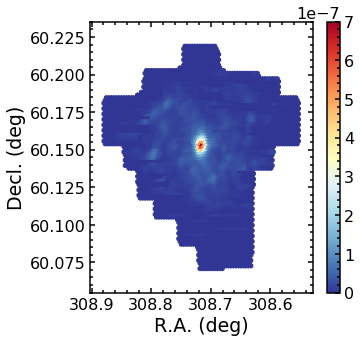

In [22]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
im = ax.scatter(ra,dec,c=int_co21,marker="h",s=20, cmap="RdYlBu_r")
plt.colorbar(im)
ax.invert_xaxis()
ax.set_xlabel("R.A. (deg)")
ax.set_ylabel("Decl. (deg)")
plt.show()

# Futher Info Saved in Structure

In [7]:
#get the distance to the center of every point
rgal_kpc = struct["rgal_kpc"]

#get the uncertainties in co21 intensitie (needed for S/N determination)
uc_co21 = struct["INT_UC_12CO21"]

**Plot intensity as function of galactocentric radius**

In [9]:
#determine the S/N of every datapoint
SN_co21 = int_co21/uc_co21

#points with significant detection (S/N>3)
idx_detect = np.where(SN_co21>3)
idx_non_detect = np.where(SN_co21<=3)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in greater
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less_equal
  


Text(0, 0.5, 'Integrated CO(2-1) Int. [K m/s]')

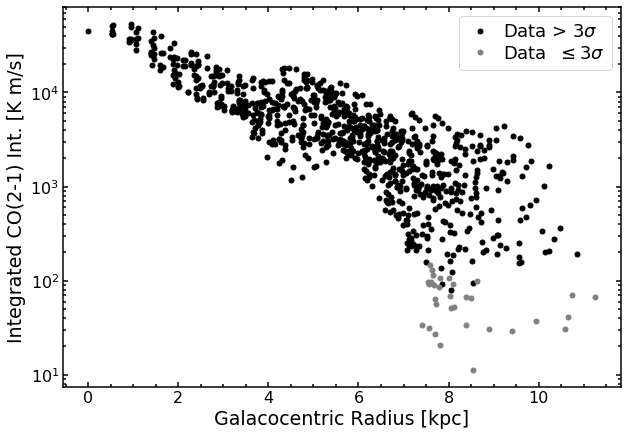

In [14]:
plt.figure(figsize=(10,7))
ax = plt.subplot(1,1,1)

#plot the detections
ax.plot(rgal_kpc[idx_detect],int_co21[idx_detect],"o", label = r"Data > 3$\sigma$", ms=5)

#plot the nondetections
ax.plot(rgal_kpc[idx_non_detect],int_co21[idx_non_detect],"o", ms=5,c = "grey", label = r"Data  $\leq 3\sigma$")

ax.set_yscale("log")
ax.legend()

ax.set_xlabel("Galacocentric Radius [kpc]")
ax.set_ylabel("Integrated CO(2-1) Int. [K m/s]")

In [10]:
vaxis = struct["SPEC_VCHAN0_12CO21"]+np.arange(len(struct["SPEC_VAL_12CO21"][0]))*struct["SPEC_DELTAV_12CO21"]

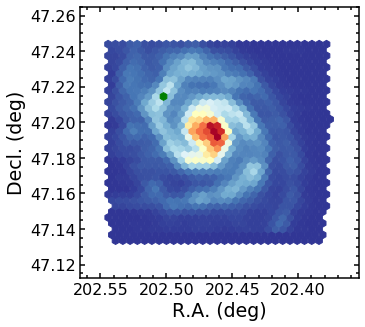

In [11]:
plt.figure(figsize=(5,5))
ax = plt.subplot(1,1,1)
ax.scatter(ra,dec,c=int_co21,marker="h",s=60, cmap="RdYlBu_r")
ax.scatter(ra[780],dec[780],color = "green",marker="h",s=60, cmap="RdYlBu_r")
ax.invert_xaxis()
ax.set_xlabel("R.A. (deg)")
ax.set_ylabel("Decl. (deg)")
plt.show()

Text(0, 0.5, 'Int [K]')

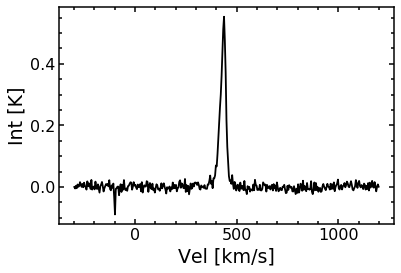

In [61]:
plt.plot(vaxis/1000, struct["spec_val_12co21".upper()][780])
plt.xlabel("Vel [km/s]")
plt.ylabel("Int [K]")

Text(0, 0.5, 'Int [K]')

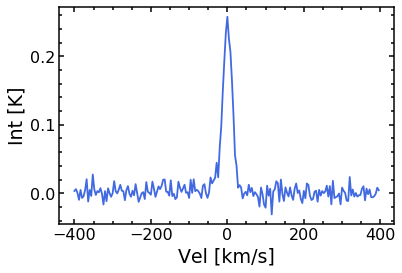

In [79]:
vaxis_shuff = struct["SPEC_VCHAN0_SHUFF12CO21"]+np.arange(len(struct["SPEC_VAL_SHUFF12CO21"][0]))*struct["SPEC-DELTAV_SHUFF12CO21"]
plt.plot(vaxis_shuff/1000,struct["spec_val_SHUFF12co21".upper()][250],color="royalblue")
plt.xlabel("Vel [km/s]")
plt.ylabel("Int [K]")

Text(0, 0.5, 'Int [K]')

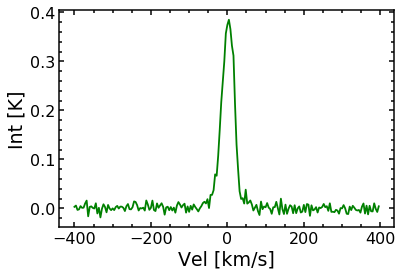

In [82]:
stacked = np.nanmedian([struct["spec_val_SHUFF12co21".upper()][250],struct["spec_val_SHUFF12co21".upper()][650],struct["spec_val_SHUFF12co21".upper()][780]], axis = 0)
plt.plot(vaxis_shuff/1000,stacked,color="green")
plt.xlabel("Vel [km/s]")
plt.ylabel("Int [K]")

In [81]:
stacked

0.0030691341962796647

In [27]:
np.unique(int_co21)

array([-4.13567554e-02, -1.20272012e-02, -6.49902457e-03, -3.50432191e-03,
        0.00000000e+00,  1.12325493e-02,  2.07349937e-02,  2.72466205e-02,
        2.91611983e-02,  3.04279570e-02,  3.07784509e-02,  3.14325057e-02,
        3.33891250e-02,  3.34807094e-02,  3.71017437e-02,  4.08258960e-02,
        5.13399839e-02,  5.29776253e-02,  5.68418317e-02,  6.39684126e-02,
        6.46134242e-02,  6.75882548e-02,  6.78185532e-02,  6.92194104e-02,
        7.03287534e-02,  8.02515894e-02,  8.65132934e-02,  8.98898207e-02,
        9.10560116e-02,  9.14466307e-02,  9.29816267e-02,  9.54690948e-02,
        9.61100804e-02,  9.75113520e-02,  1.00042274e-01,  1.07207038e-01,
        1.07813064e-01,  1.16041873e-01,  1.23678695e-01,  1.29621239e-01,
        1.36560159e-01,  1.45041883e-01,  1.54544204e-01,  1.56505994e-01,
        1.57112673e-01,  1.60023816e-01,  1.62831150e-01,  1.79118093e-01,
        1.86968921e-01,  1.89680457e-01,  1.90588142e-01,  1.93666752e-01,
        2.00092509e-01,  

In [12]:
len(struct["SPEC_VAL_CII"][np.argmin(struct["rgal_kpc"])])

52

In [13]:
np.argmin(struct["rgal_kpc"])

784

In [23]:
np.nansum(struct["INT_VAL_CII"])

0.0

In [18]:
struct["INT_VAL_CII"]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan